In [96]:
import numpy as np
import matplotlib.pyplot as plt


In [97]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


In [98]:
def get_fp_tp(actual, pred, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(actual)):
        if actual[i] == 1:
            if pred[i] > threshold:
                tp += 1
            else:
                fn += 1
        else:
            if pred[i] > threshold:
                fp += 1
            else:
                tn += 1

    return tp/(tp+fn), fp/(fp+tn)


In [115]:
label = np.load('label.npy')
score1 = np.load('score.npy')
score2 = np.load('score1.npy')
score1 = normalize(score1, 0, 1)
score2 = normalize(score2, 0, 1)


In [140]:

fpr1 = []
tpr1 = []
fpr2 = []
tpr2 = []
thsld = np.linspace(1, 0, num=20)
for i in thsld:
    tp, fp = get_fp_tp(label, score1, i)
    fpr1.append(fp)
    tpr1.append(tp)
    tp2, fp2 = get_fp_tp(label, score2, i)
    fpr2.append(fp2)
    tpr2.append(tp2)


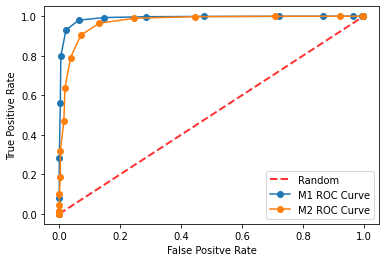

In [141]:


plt.plot([0, 1], [0, 1], linestyle='--', lw=2,
         color='r', label='Random', alpha=.8)
plt.plot(fpr1, tpr1, label="M1 ROC Curve",marker='o' )
plt.plot(fpr2, tpr2, label="M2 ROC Curve",marker='o')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [142]:

print(np.trapz(tpr1, fpr1))
print(np.trapz(tpr2, fpr2))


0.9894237454500838
0.9681889933184838


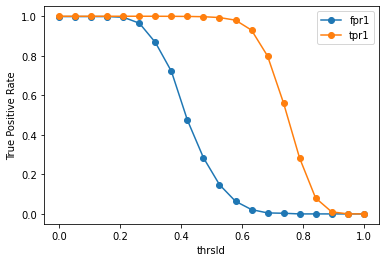

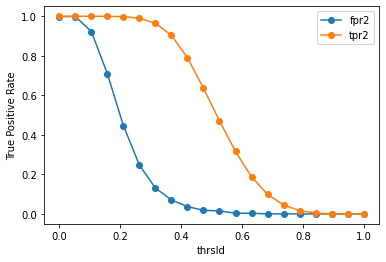

In [145]:

plt.plot(thsld, fpr1, label="fpr1",marker='o' )
plt.plot(thsld, tpr1, label="tpr1",marker='o')
plt.xlabel("thrsld")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
plt.plot(thsld, fpr2, label="fpr2",marker='o' )
plt.plot(thsld, tpr2, label="tpr2",marker='o')
plt.xlabel("thrsld")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()